In [178]:
import pandas as pd
salary_data = pd.read_csv("datascience_salaries.csv")
salary_data.head(20)

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000
5,6,Data scientist,Full Time,Senior,London,USD,68000
6,7,Data scientist,Full Time,Senior,Research Triangle Park,USD,69000
7,8,Data scientist,Full Time,Senior,Sydney,USD,68000
8,9,Data scientist,Full Time,Senior,San Francisco,USD,140000
9,10,Data scientist,Full Time,Senior,Sofia,USD,68000


In [ ]:
# creating a copy for a backup
salary_data_copy = salary_data.copy() 

In [180]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [181]:
salary_data.nunique()

Unnamed: 0          1171
job_title              5
job_type               2
experience_level       4
location             320
salary_currency        3
salary                87
dtype: int64

In [ ]:
# checking missing values in teh dataset
salary_data.isna().sum()

Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

In [184]:
# Checking for duplicates in the dataset
salary_data.duplicated().sum()

np.int64(0)

In [185]:
salary_data.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [ ]:
# creating a new column for salary before quantile capping
salary_data["salary_before"] = salary_data["salary"]

In [ ]:
# performing quantile capping for "salary" column using Q2,Q98 because salaris usually have very high-end outliers
q_lo, q_hi = 0.02, 0.98
lower = salary_data["salary"].quantile(q_lo)
upper = salary_data["salary"].quantile(q_hi)


salary_data["salary_after"] = salary_data["salary"].clip(lower=lower, upper=upper)

/var/folders/zs/lhn3v0dx0v32gt7hm_r0m1zc0000gn/T/ipykernel_58932/2059978100.py:5: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  salary_data["salary_after"] = salary_data["salary"].clip(lower=lower, upper=upper)


/var/folders/zs/lhn3v0dx0v32gt7hm_r0m1zc0000gn/T/ipykernel_58932/2914698266.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([box1,box2], labels=["Before", "After"])  # two boxes next to each other


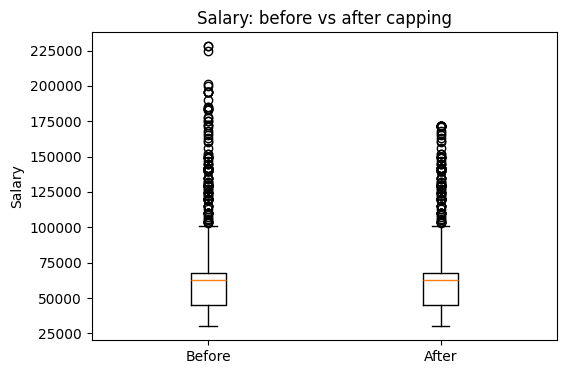

In [ ]:
#Visualization of "salary" data before and after treating outliers 
import matplotlib.pyplot as plt
box1 = salary_data["salary_before"]
box2 = salary_data["salary_after"]
plt.figure(figsize=(6,4))
plt.boxplot([box1,box2], labels=["Before", "After"])  
plt.title("Salary: before vs after capping")
plt.ylabel("Salary")
plt.show()

In [ ]:
# We have 3 differenct currencies in "currency" column which needs to be converted only to one currency.In this case it will be USD,since it is a majority of values.
salary_data["salary_currency"].value_counts()

salary_currency
USD    1157
EUR       9
GBP       5
Name: count, dtype: int64

In [ ]:
# checking if values "salary" are all integers
salary_data["salary"].dtypes

dtype('int64')

In [233]:
salary_data.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,salary_usd,salary_normalized,salary_after,salary_before
0,0,Data scientist,Full Time,Senior,New York City,USD,149000,149000.0,0.601010,149000,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000,120000.0,0.454545,120000,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000,68000.0,0.191919,68000,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000,120000.0,0.454545,120000,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000,149000.0,0.601010,149000,149000


In [ ]:
# Converting salaries from EUR and GBP -> USD  and adding them into a new column "salary_usd"
usd_to_usd = 1.00
eur_to_usd = 1.08
gbp_to_usd = 1.25 

salary_data.loc[salary_data["salary_currency"] == "USD", "salary_usd"] = (salary_data["salary_after"] * usd_to_usd)
salary_data.loc[salary_data["salary_currency"] == "EUR", "salary_usd"] = (salary_data["salary_after"] * eur_to_usd)
salary_data.loc[salary_data["salary_currency"] == "GBP", "salary_usd"] = (salary_data["salary_after"] * gbp_to_usd)

In [252]:
salary_data.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,salary_usd,salary_normalized,salary_after,salary_before
0,0,Data scientist,Full Time,Senior,New York City,USD,149000,149000.0,0.840395,149000,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000,120000.0,0.635593,120000,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000,68000.0,0.268362,68000,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000,120000.0,0.635593,120000,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000,149000.0,0.840395,149000,149000


In [253]:
from sklearn.preprocessing import MinMaxScaler
# normalizing data for easier analysis
scaler = MinMaxScaler()
salary_data['salary_normalized'] = scaler.fit_transform(salary_data[['salary_usd']])

In [255]:

from sklearn.decomposition import PCA

import pandas as pd

# One-hot encode categorical columns
categorical_cols = salary_data.select_dtypes(include=["object"]).columns
encoded = pd.get_dummies(salary_data[categorical_cols])

# Combine with numeric columns
numeric_cols = salary_data.select_dtypes(include=["number"])
processed_data = pd.concat([numeric_cols, encoded], axis=1)

# Now run PCA
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(processed_data)
print("Number of components chosen:", pca.n_components_)


Number of components chosen: 1


In [ ]:
# Define the order of experince level in the dataset (lowest to highest)
order =["Entry","Mid","Senior","Executive"]
salary_data["experience_level"] = pd.Categorical(
    salary_data["experience_level"],
    categories=order,
    ordered=True
)

In [ ]:


experience_level = salary_data.groupby("experience_level")["salary_usd"].mean().round(1)
display(experience_level)


/var/folders/zs/lhn3v0dx0v32gt7hm_r0m1zc0000gn/T/ipykernel_58932/700352669.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience_level = salary_data.groupby("experience_level")["salary_usd"].mean().round(1)


experience_level
Entry        36111.1
Mid          51975.0
Senior       74498.5
Executive    75815.4
Name: salary_usd, dtype: float64

In [ ]:
# Group dataset by experince level  and calculate median
experience_level = salary_data.groupby("experience_level")["salary_usd"].median().round(1)
display(experience_level)

/var/folders/zs/lhn3v0dx0v32gt7hm_r0m1zc0000gn/T/ipykernel_58932/12967953.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience_level = salary_data.groupby("experience_level")["salary_usd"].median().round(1)


experience_level
Entry        30000.0
Mid          51000.0
Senior       68000.0
Executive    46000.0
Name: salary_usd, dtype: float64